<a href="https://colab.research.google.com/github/MuhammadRifatA/ML/blob/main/ML12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tugas Praktikum

Mendeteksi orientasi teks dan jenis skrip
Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (8,076 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [3]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
import argparse
import imutils

1. Persiapan Gambar

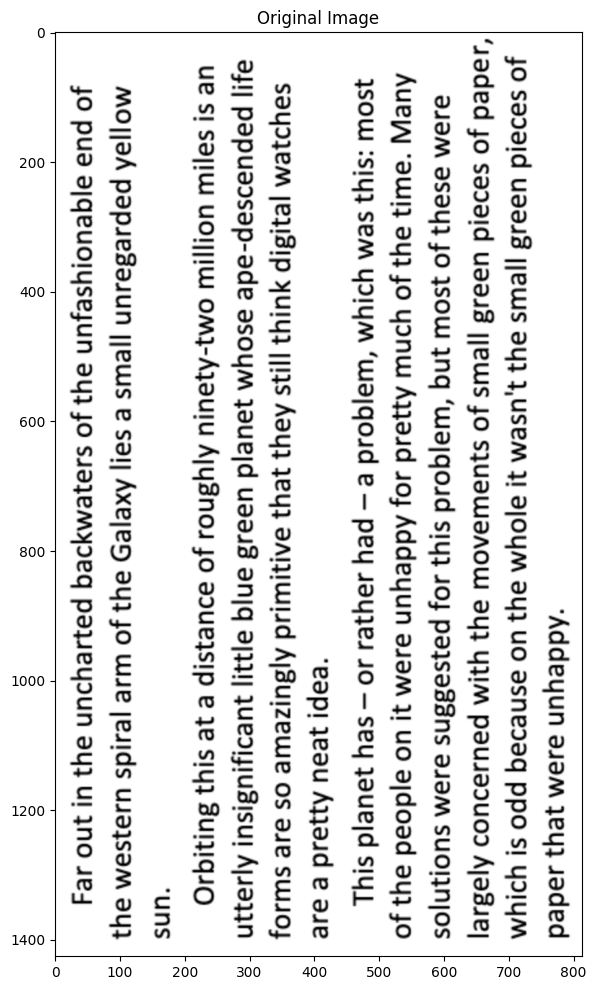

In [4]:
# membaca image
image = cv2.imread('/content/drive/MyDrive/Kuliah/ML/images/hitchhikers-rotated.png')

# ubah citra bgr ke rgb
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(original)
plt.title('Original Image')
plt.show()

2. Deteksi Orientasi dan Skrip

In [5]:
# mendeteksi orientasi gambar dan mendapatakan sudut rotasi serta jenis skrip
osd=pytesseract.image_to_osd(original, output_type=Output.DICT)

# menampilkan informasi orientasi
print("[INFO] detected orientation: {}".format(
	osd["orientation"]))
print("[INFO] rotate by {} degrees to correct".format(
	osd["rotate"]))
print("[INFO] detected script: {}".format(osd["script"]))


[INFO] detected orientation: 270
[INFO] rotate by 90 degrees to correct
[INFO] detected script: Latin


In [6]:
# rotate gambar untuk memperbaiki orientasinya
rotated = imutils.rotate_bound(image, angle=osd["rotate"])

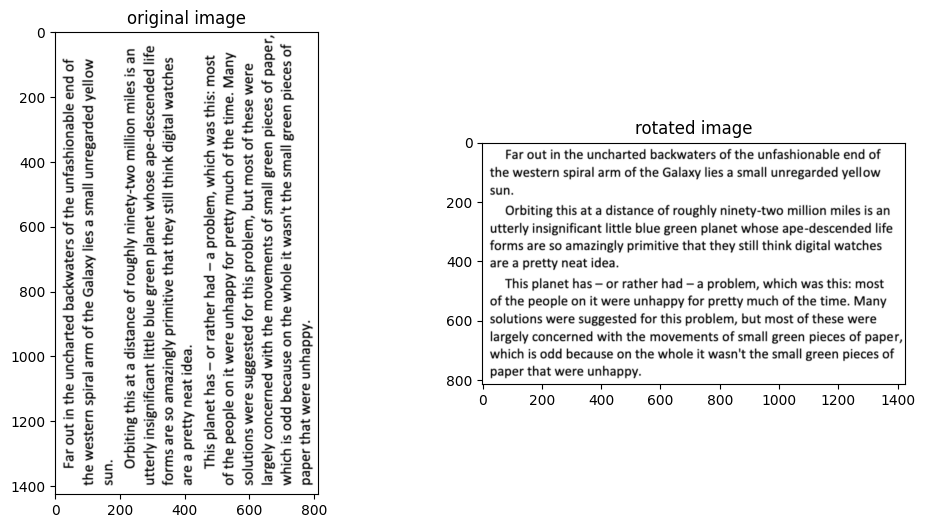

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(original), plt.title('original image')
plt.subplot(122), plt.imshow(rotated), plt.title('rotated image')
plt.show()